<a href="https://colab.research.google.com/github/Themiyashanu/house-price-prediction/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Step 1: Data Loading and Exploration

In [ ]:
# Load the California housing dataset
# This dataset contains information about housing in California
housing = fetch_california_housing()

# Create a DataFrame (like an Excel sheet) with our data
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target  # Add the target column (house prices)

print("Dataset shape:", df.shape)  # Shows (rows, columns)
print("\nFirst 5 rows:")
print(df.head())  # Display first 5 rows

print("\nDataset info:")
print(df.info())  # Shows data types and missing values

print("\nBasic statistics:")
print(df.describe())  # Shows mean, std, min, max for each column

Dataset shape: (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  flo

Step 2: Data Visualization and Analysis

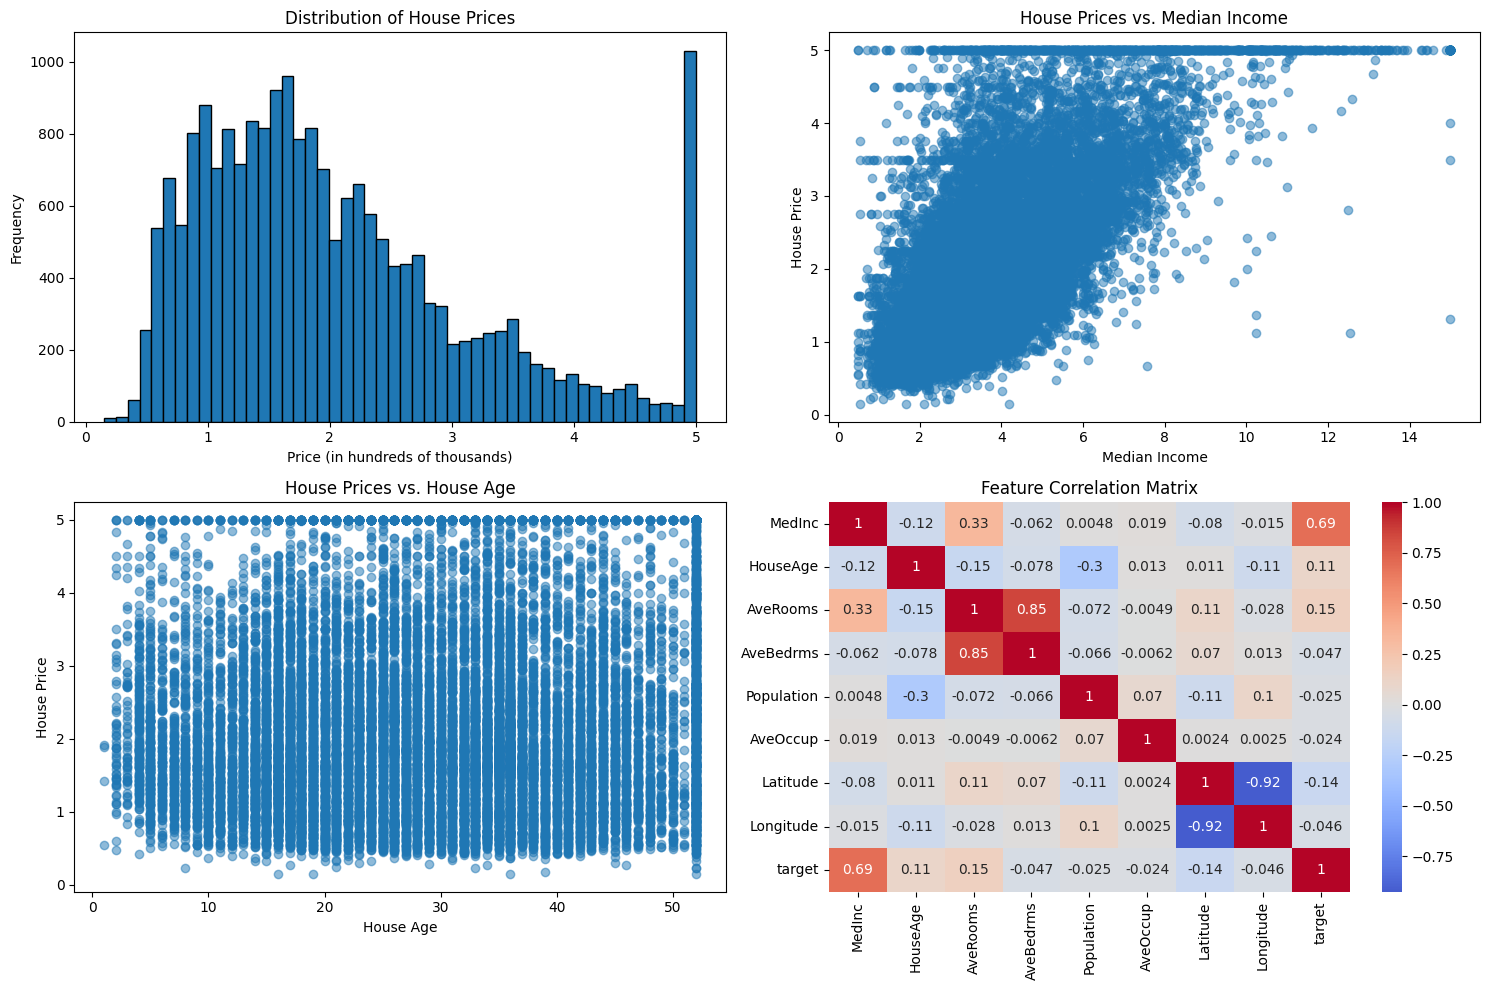

In [ ]:
# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribution of house prices
axes[0,0].hist(df['target'], bins=50, edgecolor='black')
axes[0,0].set_title('Distribution of House Prices')
axes[0,0].set_xlabel('Price (in hundreds of thousands)')
axes[0,0].set_ylabel('Frequency')

# 2. House prices vs. median income
axes[0,1].scatter(df['MedInc'], df['target'], alpha=0.5)
axes[0,1].set_title('House Prices vs. Median Income')
axes[0,1].set_xlabel('Median Income')
axes[0,1].set_ylabel('House Price')

# 3. House prices vs. house age
axes[1,0].scatter(df['HouseAge'], df['target'], alpha=0.5)
axes[1,0].set_title('House Prices vs. House Age')
axes[1,0].set_xlabel('House Age')
axes[1,0].set_ylabel('House Price')

# 4. Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

Step 3: Data Preprocessing

In [ ]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']  # Only the 'target' column

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Scale the features (make them have similar ranges)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed!")

Features shape: (20640, 8)
Target shape: (20640,)
Training set size: 16512 samples
Test set size: 4128 samples

Feature scaling completed!


Step 4: Model Training

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model training completed!")

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Predictions made!")

Model training completed!
Predictions made!


Step 5: Model Evaluation

Model Performance:
Training MSE: 0.5179
Test MSE: 0.5559
Training R²: 0.6126
Test R²: 0.5758


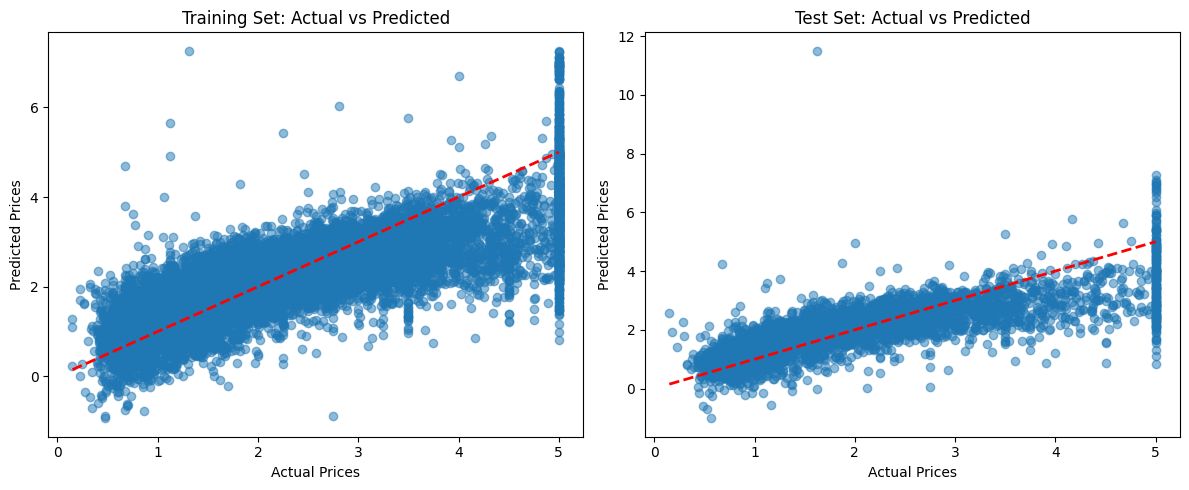

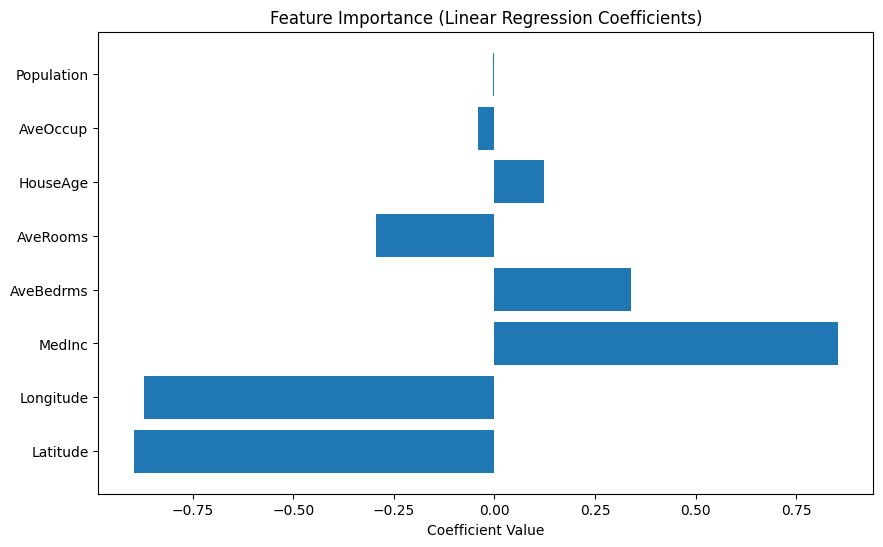


Feature Importance:
      feature  coefficient
6    Latitude    -0.896929
7   Longitude    -0.869842
0      MedInc     0.854383
3   AveBedrms     0.339259
2    AveRooms    -0.294410
1    HouseAge     0.122546
5    AveOccup    -0.040829
4  Population    -0.002308


In [ ]:
# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training Set: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()

print("\nFeature Importance:")
print(feature_importance)

Step 6: Making New Predictions

In [ ]:
# Example: Predict price for a new house
new_house = np.array([[8.0, 41.0, 6.98, 1.02, 322.0, 2.56, 37.88, -122.23]])  # Example values
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)

print(f"Predicted price for new house: ${predicted_price[0]*200000:.2f}")

Predicted price for new house: $800708.70
